# Άσκηση 1

## Παναγιώτης Τσιάβος Α.Μ. 2396


<b>Στα σχόλια του python αρχείου (ask1.py) φένονται παραλλαγές των παρακάτω συναρτήσεων  με χρήση for-loops, αλλά μιας και επιτρέπεται η χρήση της βιβλιοθήκης numpy θεώρησα οτι δεν χρείαζεται να διατρέχουμε (for-loops) τα arrays</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
R = np.array(Image.open('trikoupi6.png')) # Open Image an cast it as an numpy array
R.shape

(1623, 1031)

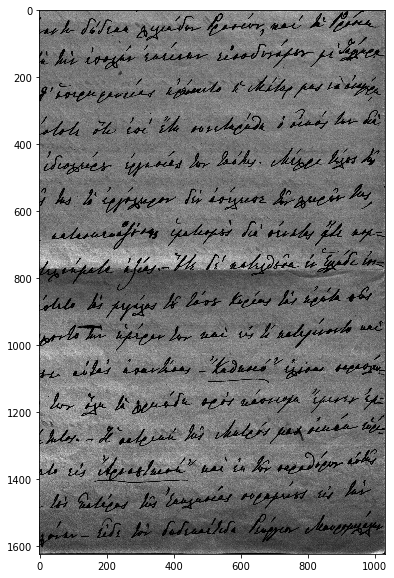

In [3]:
plt.figure(figsize = (10,10))
plt.imshow(R, cmap='gray')

### Grayscale Conversion

O μέσος όρο των καναλιών Red, Green, Blue (δηλ. για καθε R,G,B γραμμή του πίνακα, έστω Χ) υπολογίζεται ως:
$$ X^{'} = \frac{R+G+B}{3}$$
 
Η numpy μας επιτρέπει την πράξη αυτήν με np.mean() όπου το όρισμα
axis=2 αντιστοιχεί στο να πάρει τις μέσες τιμές από τα τρία κανάλια χρώματος.

(axis = 0 θα ήταν κατά μέσο όρο σε γραμμές εικονοστοιχείων και axis = 1 θα ήταν κατά μέσο όρο σε στήλες)

In [4]:
def grayscaling(A):
    if(len(A.shape)==3):             # Check if the the image is in rgb format
        return np.mean(A, axis=2)    # Return the average values across all three color channels
    return A

In [5]:
R = grayscaling(R)
print('Image shape:', R.shape)
print('Min. brightness:', R.min())
print('Max. brightness:', R.max())

Image shape: (1623, 1031)
Min. brightness: 0
Max. brightness: 255


### Threshold

Η numpy μας επιτρέπει να κάνουμε σύγκριση τιμών σε πίνακες, επιστρέφοντας εναν boolean πίνακα (ίδου μεγέθους με τον πίνακα που συγκρίνουμε) όπου κάθε κελί απεικονίζει αν η τιμή στον αρχικό πίνακα ικανοποιεί την συνθήκη.  
π.χ. [0, 0, 10 ] < 5  -------> [True, True, False]  

Με χρήση αυτόν τον πίνακα μπορούμε να μετατρέψουμε τις τιμές που αντιστοιχουν σε True , και ανάποδα (invert() για να μετρέψουμε τα true σε False)

In [6]:
def thresholding(A, k):
    idx = A[:] <= k         # Boolean Array,  representing if Values satisfy the given condition
    A[idx] = 0              # Replace values of True indexes with 0 (black)
    A[np.invert(idx)] = 255 # Invert boolean array and replace values of True indexes (original False)  with 255 (white)
    return A

### Plotting

Παρακάτω βλέπου ενα plot για 5 διαφορετικές τιμές κατωφλίου (30,60,90,120,150). Παρατηρούμε οτι για μεγάλες τιμές δεν μπορούμε να ξεχωρίσουμε τα γράμματα της εικόνας, μιας και τα κελιά του πίνακα (που αντιστοιχούν σε γράμματα) μετατρέπονται από την συνάρτηση κατωφλίου σε μαυρα κελιά.  



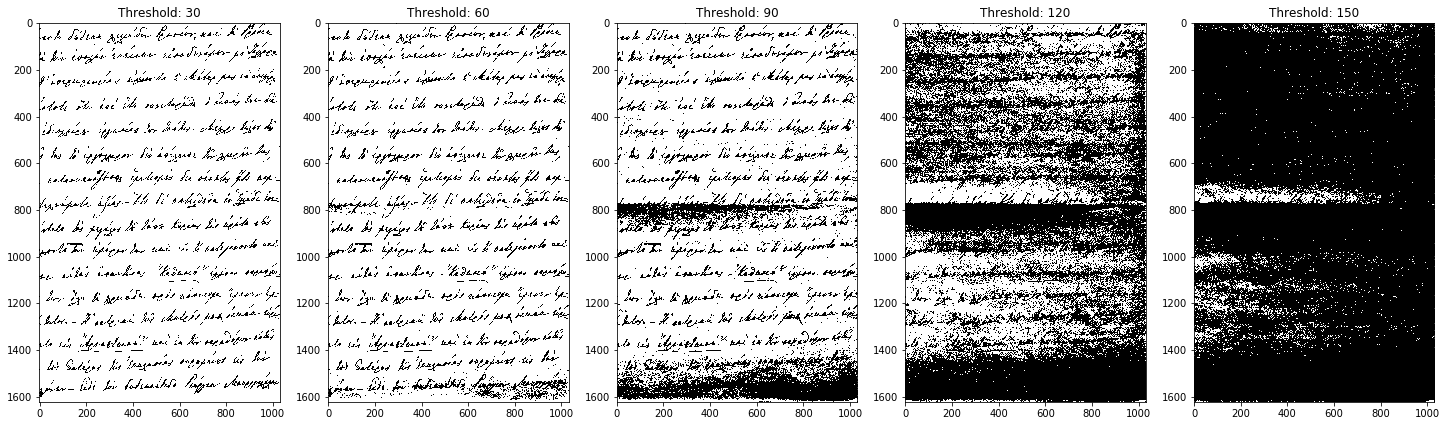

In [7]:
fig=plt.figure(figsize=(25, 20))
columns = 5
rows = 1
#Since it's grayscaled ---> [0,255]
threshold_values = [30,60,90,120,150]        # Change this list for other threshold values

for i,k in enumerate(threshold_values):
    img = thresholding(R.copy(), k)           #Calling threshold function with a copy of R and current threshold in list
    ax = fig.add_subplot(rows, columns, i+1)  # Adding to plot
    ax.title.set_text('Threshold: '+str(k))   # Add title for current plot
    plt.imshow(img, cmap='gray')
    

### Test for RGB image

Text(0.5, 1.0, 'Image Before grayscaling')

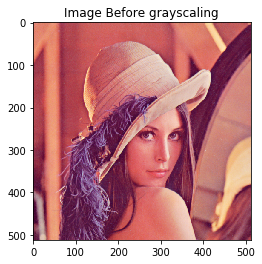

In [8]:
rgb = np.array(Image.open('lena.png'))
plt.imshow(Image.open('lena.png'))
plt.title('Image Before grayscaling')

Shape before conversion: (512, 512, 3)
Shape after grayscale conversion: (512, 512)
Min. brightness: 35.333333333333336
Max. brightness: 240.0

First 5 rows: [[162.66666667 162.66666667 164.33333333 ... 166.66666667 153.66666667
  129.66666667]
 [162.66666667 162.66666667 164.33333333 ... 166.66666667 153.66666667
  129.66666667]
 [162.66666667 162.66666667 164.33333333 ... 166.66666667 153.66666667
  129.66666667]
 [162.66666667 162.66666667 164.33333333 ... 166.66666667 153.66666667
  129.66666667]
 [162.66666667 162.66666667 164.33333333 ... 166.66666667 153.66666667
  129.66666667]]


Text(0.5, 1.0, 'Image after grayscale conversion')

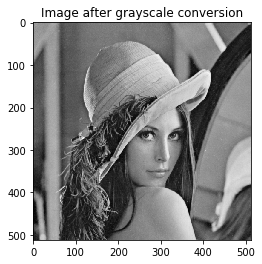

In [9]:
print("Shape before conversion:", rgb.shape)
rgb = grayscaling(rgb)      # Calling grayscaling function
print("Shape after grayscale conversion:", rgb.shape)
print('Min. brightness:', rgb.min())
print('Max. brightness:', rgb.max())
print("\nFirst 5 rows:",rgb[:5])

plt.imshow(rgb, cmap='gray')
plt.title('Image after grayscale conversion')

Text(0.5, 1.0, 'Threshold: 100')

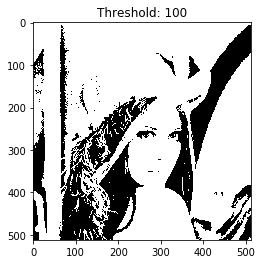

In [10]:
threshold = 100
img = thresholding(rgb.copy(), threshold)  #Calling thresholding function
plt.imshow(img, cmap='gray')
plt.title("Threshold: " + str(threshold))